### 1. Make classification data and get it ready 

In [1]:
import sklearn
from sklearn.datasets import make_circles 

In [2]:
n_samples = 1000 

X, y = make_circles(n_samples, noise=0.03, random_state=42)

print(X[:5])  # input_dim = 2
print(y[:5])  # output_dim = 1 -> binary classification -> output_layer activation => sigmoid 

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [3]:
import pandas as pd 
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y}) 

circles.head() 

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


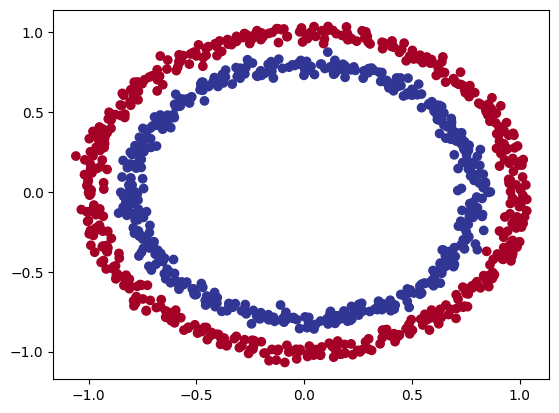

In [4]:
import matplotlib.pyplot as plt 

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu) 
plt.show() 

In [5]:
# check input and output shapes 
X.shape, y.shape 

((1000, 2), (1000,))

In [6]:
# view the first exmple of feuatres and labels 
X_sample = X[0] 
y_sample = y[0] 

X_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

In [7]:
# turn data into tensor and create train and test splits 
import torch 

X = torch.from_numpy(X).type(torch.float32) 
y = torch.from_numpy(y).type(torch.float32) 

X.dtype, y.dtype

(torch.float32, torch.float32)

In [8]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test) 

(800, 200, 800, 200)

In [10]:
from torch import nn 

device = "cuda" if torch.cuda.is_available() else "cpu" 
device 

'cpu'

In [11]:
class CircleModelV0(nn.Module): 
    def __init__(self): 
        super().__init__() 
        
        self.layer_1 = nn.Linear(in_features=2, out_features=5) 
        self.layer_2 = nn.Linear(in_features=5, out_features=1) 
        
    def forward(self, x): 
        return self.layer_2(self.layer_1(x)) 
    
model_0 = CircleModelV0().to(device) 
model_0  

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5), 
    nn.Linear(in_features=5, out_features=1) 
).to(device) 

model_1 

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
loss_fn = nn.BCEWithLogitsLoss()  # Sigmoid + Binary Cross Entropy 
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01) 

In [14]:
def accuracy(y_true, y_pred): 
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc 

In [15]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42) 

epochs = 100 

X_train, y_train = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device) 

for epoch in range(epochs): 
    model_0.train() 
    
    # forward padd 
    y_logits = model_0(X_train).squeeze()  # NC -> C 
    y_preds = torch.round(torch.sigmoid(y_logits))  # logits -> probs -> labels 
    
    # calculate loss 
    loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss needs logits 
    
    acc = accuracy(y_train, y_preds)  
    
    # optimizer zero grad 
    optimizer.zero_grad() 
    
    # loss backward  
    loss.backward() 
    
    # optimizer step 
    optimizer.step() 
    
    # testing 
    model_0.eval() 
    with torch.inference_mode(): 
        # forward pass 
        test_logits = model_0(X_test).squeeze() 
        test_preds = torch.round(torch.sigmoid(test_logits)) 
        
        # calculate test loss 
        test_loss = loss_fn(test_logits, y_test) 
        
        test_acc = accuracy(y_test, test_preds) 
        
    # print out what's happening 
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")
    


Epoch: 0 | Loss: 0.69536 | Acc: 50.00 | Test Loss: 0.70085 | Test Acc: 48.00
Epoch: 10 | Loss: 0.69305 | Acc: 50.62 | Test Loss: 0.69357 | Test Acc: 50.00
Epoch: 20 | Loss: 0.69308 | Acc: 49.75 | Test Loss: 0.69392 | Test Acc: 47.50
Epoch: 30 | Loss: 0.69301 | Acc: 50.88 | Test Loss: 0.69533 | Test Acc: 45.50
Epoch: 40 | Loss: 0.69298 | Acc: 51.25 | Test Loss: 0.69479 | Test Acc: 45.50
Epoch: 50 | Loss: 0.69299 | Acc: 51.00 | Test Loss: 0.69443 | Test Acc: 47.00
Epoch: 60 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69477 | Test Acc: 45.50
Epoch: 70 | Loss: 0.69298 | Acc: 51.50 | Test Loss: 0.69473 | Test Acc: 45.50
Epoch: 80 | Loss: 0.69298 | Acc: 51.50 | Test Loss: 0.69462 | Test Acc: 45.50
Epoch: 90 | Loss: 0.69298 | Acc: 51.25 | Test Loss: 0.69471 | Test Acc: 46.00


In [16]:
import numpy as np 

def plot_decision_boundary(model, X, y):
    """
    Plots decision boundaries of model predicting on X in comparison to y.
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

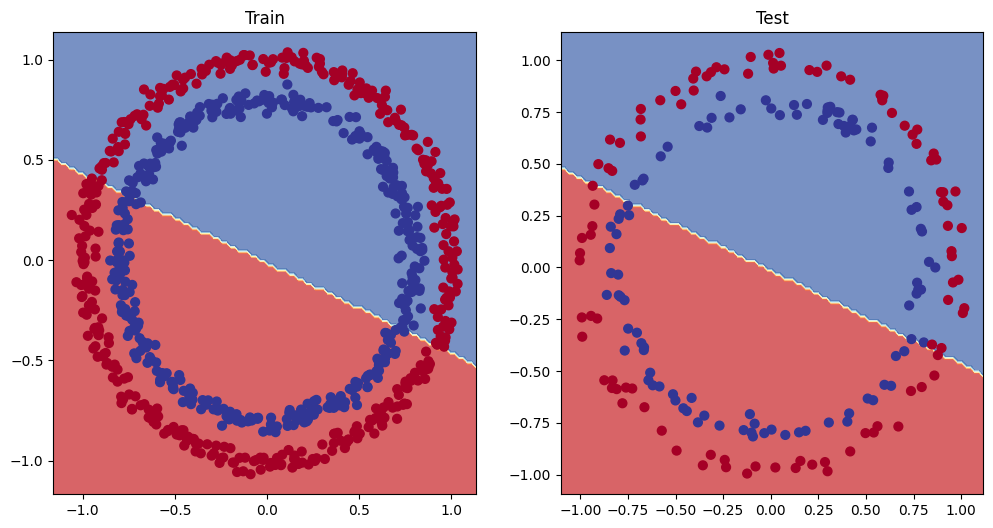

In [17]:
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1) 

plt.title("Train") 
plot_decision_boundary(model_0, X_train, y_train) 

plt.subplot(1, 2, 2) 
plt.title("Test") 
plot_decision_boundary(model_0, X_test, y_test) 

In [18]:
class CircleModelV1(nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.layer_1 = nn.Linear(in_features=2, out_features=10) 
        self.layer_2 = nn.Linear(in_features=10, out_features=10) 
        self.layer_3 = nn.Linear(in_features=10, out_features=1) 
        
    def forward(self, x): 
        return self.layer_3(self.layer_2(self.layer_1(x)))  
    
model_1 = CircleModelV1().to(device) 
model_1 

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [19]:
# param size 

for name, param in model_1.named_parameters(): 
    print(f"{name:10} {param.size()} {param.numel()}")  
# for param in model_1.parameters(): 
#     print(param.numel())

layer_1.weight torch.Size([10, 2]) 20
layer_1.bias torch.Size([10]) 10
layer_2.weight torch.Size([10, 10]) 100
layer_2.bias torch.Size([10]) 10
layer_3.weight torch.Size([1, 10]) 10
layer_3.bias torch.Size([1]) 1


In [20]:
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01) 

In [21]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42) 

epochs = 100 

X_train, y_train = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device) 

for epoch in range(epochs): 
    model_1.train() 
    
    # forward padd 
    y_logits = model_1(X_train).squeeze()   
    y_preds = torch.round(torch.sigmoid(y_logits))  
    
    # calculate loss 
    loss = loss_fn(y_logits, y_train) 
    
    acc = accuracy(y_train, y_preds)  
    
    # optimizer zero grad 
    optimizer.zero_grad() 
    
    # loss backward  
    loss.backward() 
    
    # optimizer step 
    optimizer.step() 
    
    # testing 
    model_1.eval() 
    with torch.inference_mode(): 
        # forward pass 
        test_logits = model_1(X_test).squeeze() 
        test_preds = torch.round(torch.sigmoid(test_logits)) 
        
        # calculate test loss 
        test_loss = loss_fn(test_logits, y_test) 
        
        test_acc = accuracy(y_test, test_preds) 
        
    # print out what's happening 
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88 | Test Loss: 0.69430 | Test Acc: 50.00
Epoch: 10 | Loss: 0.69304 | Acc: 49.50 | Test Loss: 0.69429 | Test Acc: 46.50
Epoch: 20 | Loss: 0.69300 | Acc: 50.00 | Test Loss: 0.69499 | Test Acc: 45.50
Epoch: 30 | Loss: 0.69299 | Acc: 50.12 | Test Loss: 0.69456 | Test Acc: 46.50
Epoch: 40 | Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69470 | Test Acc: 45.00
Epoch: 50 | Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 45.00
Epoch: 60 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69468 | Test Acc: 45.50
Epoch: 70 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69467 | Test Acc: 46.00
Epoch: 80 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69469 | Test Acc: 45.50
Epoch: 90 | Loss: 0.69298 | Acc: 51.25 | Test Loss: 0.69467 | Test Acc: 45.50


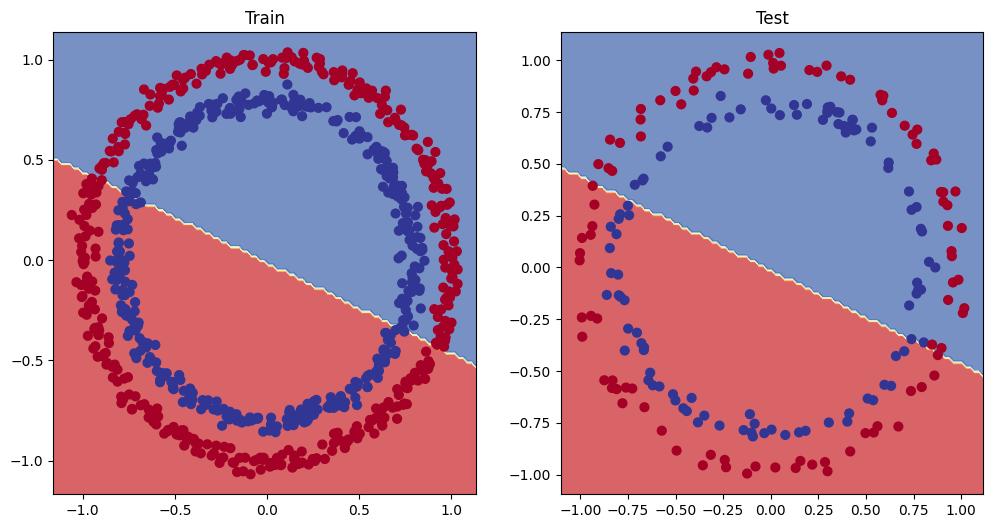

In [22]:
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1) 

plt.title("Train") 
plot_decision_boundary(model_1, X_train, y_train) 

plt.subplot(1, 2, 2) 
plt.title("Test") 
plot_decision_boundary(model_1, X_test, y_test) 

In [23]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [24]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


In [25]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    """
    Plots linear training data and test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

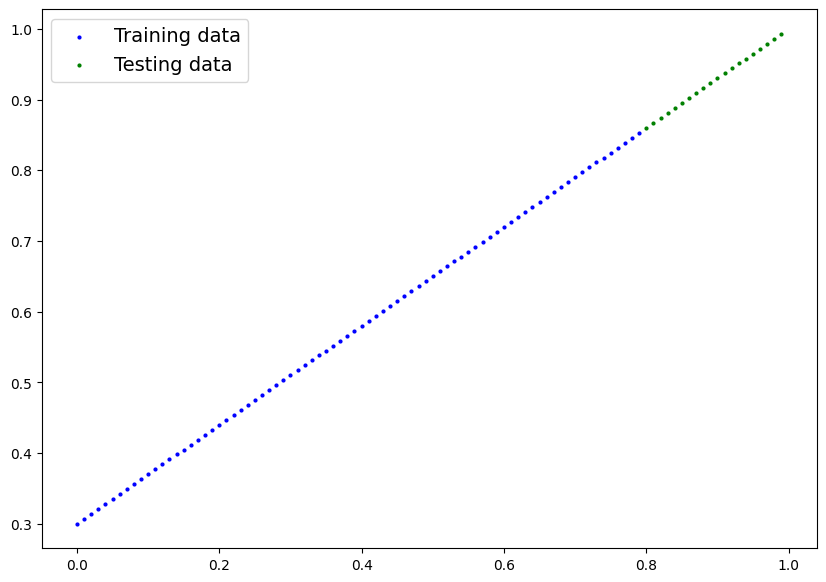

In [26]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [27]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10), 
    nn.Linear(in_features=10, out_features=10), 
    nn.Linear(in_features=10, out_features=1) 
).to(device) 

In [28]:
loss_fn = nn.L1Loss() 
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.01)

In [29]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000 

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device) 

for epoch in range(epochs): 
    model_2.train() 
    
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression) 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
    
    model_2.eval() 
    with torch.inference_mode(): 
        test_loss = loss_fn(model_2(X_test_regression), y_test_regression)
        
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.77620
Epoch: 100 | Loss: 0.00335 | Test Loss: 0.00194
Epoch: 200 | Loss: 0.00458 | Test Loss: 0.01232
Epoch: 300 | Loss: 0.00196 | Test Loss: 0.01619
Epoch: 400 | Loss: 0.01017 | Test Loss: 0.02108
Epoch: 500 | Loss: 0.00803 | Test Loss: 0.01163
Epoch: 600 | Loss: 0.00724 | Test Loss: 0.00999
Epoch: 700 | Loss: 0.00667 | Test Loss: 0.00054
Epoch: 800 | Loss: 0.00190 | Test Loss: 0.00071
Epoch: 900 | Loss: 0.00392 | Test Loss: 0.02012


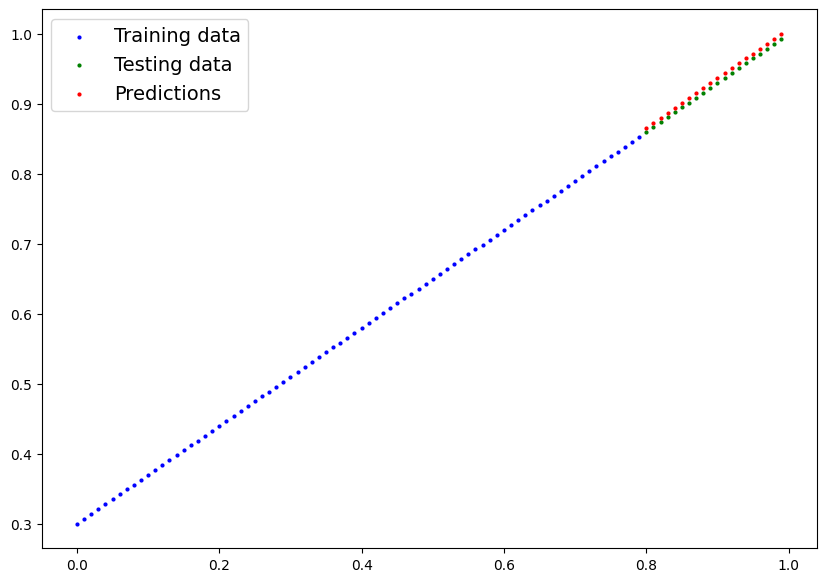

In [30]:
model_2.eval() 
with torch.inference_mode(): 
    y_preds = model_2(X_test_regression) 
    
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression, 
                 test_data=X_test_regression, 
                 test_labels=y_test_regression, 
                 predictions=y_preds) 

In [31]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [32]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.01)

In [33]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69203, Test Accuracy: 55.50%
Epoch: 100 | Loss: 0.17334, Accuracy: 99.62% | Test Loss: 0.20684, Test Accuracy: 99.00%
Epoch: 200 | Loss: 0.01503, Accuracy: 100.00% | Test Loss: 0.02743, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.00581, Accuracy: 100.00% | Test Loss: 0.01481, Test Accuracy: 100.00%
Epoch: 400 | Loss: 0.00317, Accuracy: 100.00% | Test Loss: 0.01065, Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00200, Accuracy: 100.00% | Test Loss: 0.00874, Test Accuracy: 100.00%
Epoch: 600 | Loss: 0.00138, Accuracy: 100.00% | Test Loss: 0.00754, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00101, Accuracy: 100.00% | Test Loss: 0.00677, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00076, Accuracy: 100.00% | Test Loss: 0.00622, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00060, Accuracy: 100.00% | Test Loss: 0.00579, Test Accuracy: 100.00%


In [34]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

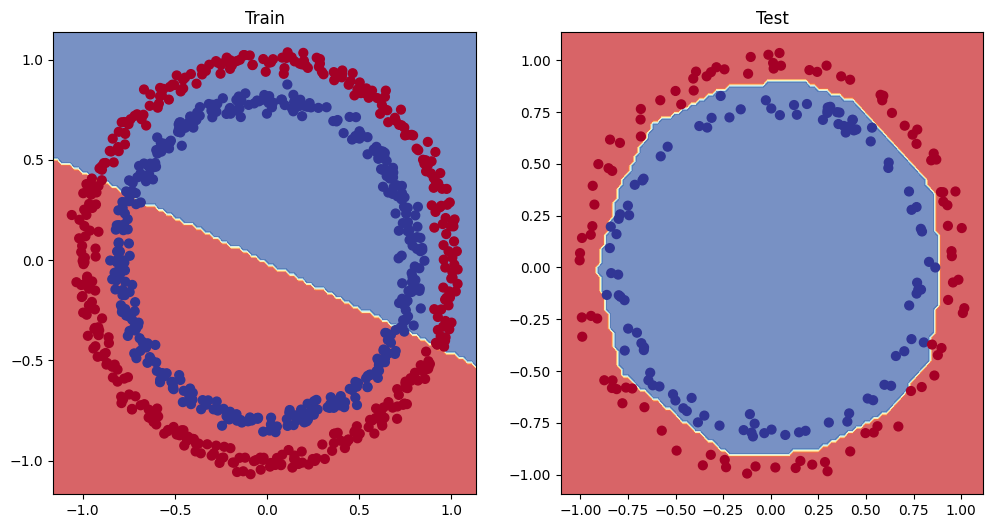

In [35]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


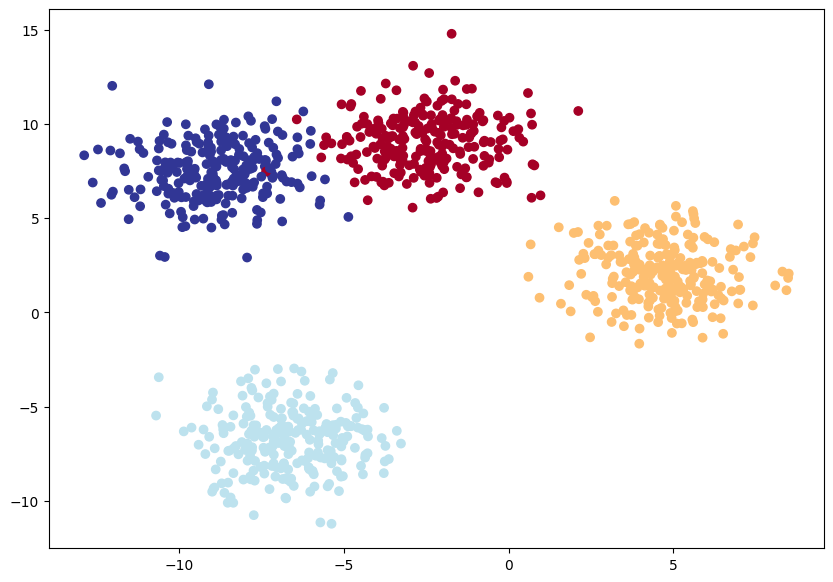

In [36]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [38]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? 
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? 
            nn.Linear(in_features=hidden_units, out_features=output_features), 
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [39]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.01)

In [45]:
with torch.inference_mode():
    y_logits = model_4(X_blob_train.to(device))[:5]  # logits
y_logits

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]])

In [46]:
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]])
tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        [0.3405, 0.0657, 0.4446, 0.1492],
        [0.2527, 0.0424, 0.2283, 0.4766]])


In [47]:
# sum to one 
torch.sum(y_pred_probs[0])

tensor(1.)

In [49]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.84577, Test Acc: 74.00%
Epoch: 10 | Loss: 0.17839, Acc: 98.88% | Test Loss: 0.15055, Test Acc: 99.50%
Epoch: 20 | Loss: 0.05535, Acc: 99.38% | Test Loss: 0.04468, Test Acc: 99.50%
Epoch: 30 | Loss: 0.03312, Acc: 99.25% | Test Loss: 0.02467, Test Acc: 99.50%
Epoch: 40 | Loss: 0.02753, Acc: 99.25% | Test Loss: 0.01741, Test Acc: 99.50%
Epoch: 50 | Loss: 0.02552, Acc: 99.38% | Test Loss: 0.01505, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02455, Acc: 99.38% | Test Loss: 0.01417, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02393, Acc: 99.50% | Test Loss: 0.01341, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02344, Acc: 99.50% | Test Loss: 0.01272, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02304, Acc: 99.50% | Test Loss: 0.01216, Test Acc: 99.50%


In [50]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:5]

tensor([[  6.2559,  14.9665, -20.5460, -14.1635],
        [  7.4557, -15.4659,   5.3803,  15.2638],
        [ -9.3754, -14.7723,  25.9017,  14.4919],
        [  2.3049,  11.7687, -12.6991, -11.0959],
        [ 12.2271,   4.5489, -18.6570,  -4.0565]])

In [51]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


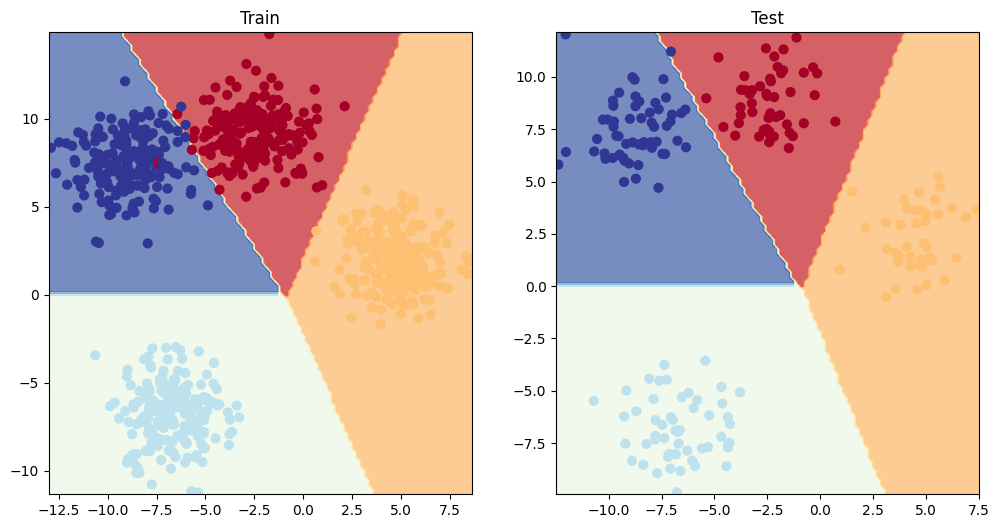

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)